In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Big 5 Dataset

In [2]:
big5data = pd.read_csv("../data/Big5Data.csv", delimiter="\t")
big5data = big5data.iloc[:, :50]
big5data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [3]:
big5data = big5data[(big5data != 0).all(axis=1)]
big5data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,...,874434.000000,874434.00000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000
mean,2.645693,2.795889,3.298964,3.167806,3.297512,2.411223,2.780479,3.443987,2.979535,3.588282,...,3.703026,2.07053,4.035008,1.995491,3.824307,1.901202,4.022261,3.221340,4.166739,3.983939
std,1.250871,1.306720,1.188259,1.210432,1.239669,1.208842,1.380444,1.242385,1.325278,1.274354,...,1.100078,1.09506,1.040036,1.071258,0.933451,1.084797,0.935574,1.222737,0.971584,0.986196
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.00000,3.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,2.00000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,3.00000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
big5ext = big5data.iloc[:, :10]
big5est = big5data.iloc[:, 10:20]
big5agr = big5data.iloc[:, 20:30]
big5csn = big5data.iloc[:, 30:40]
big5opn = big5data.iloc[:, 40:]

In [5]:
from matplotlib import cm 

def plot_by_statement(traitdata, cmap):
    figure, axes = plt.subplots(2, len(traitdata.columns) // 2, figsize=(30, 10))
    axes = axes.flatten()
    for i, column in enumerate(traitdata.columns):
        value_counts = traitdata[column].value_counts().sort_index()
        axes[i].bar(value_counts.index, value_counts.values,
                    color=cmap(np.linspace(0.4, 0.8, len(value_counts))))
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xticks(range(1, 6))

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

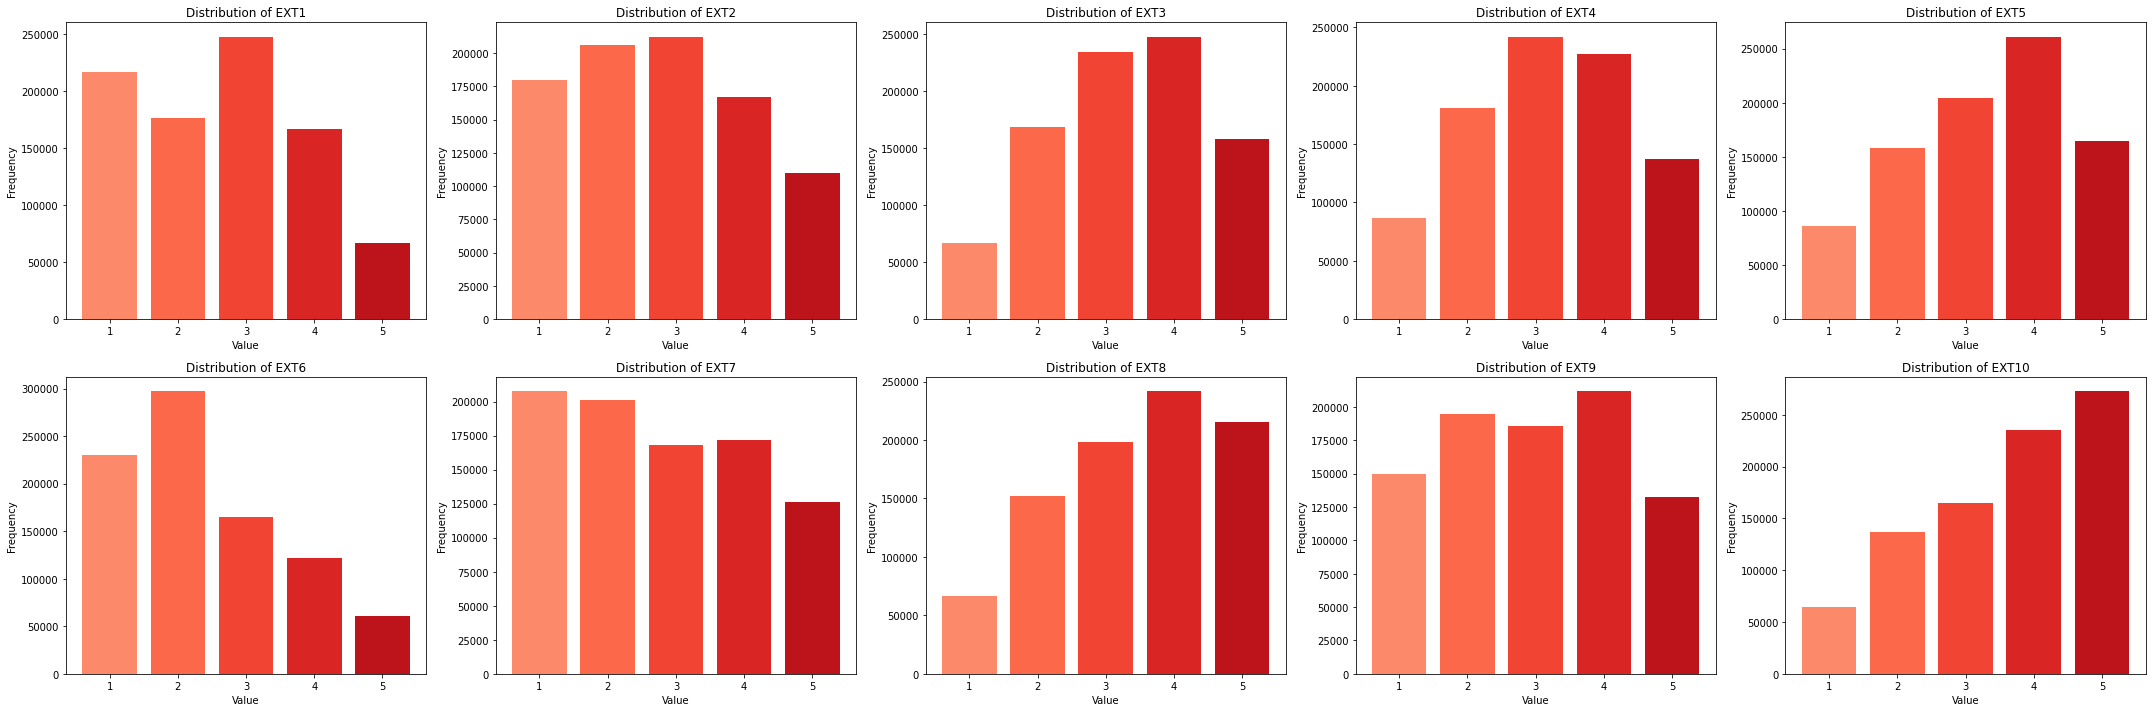

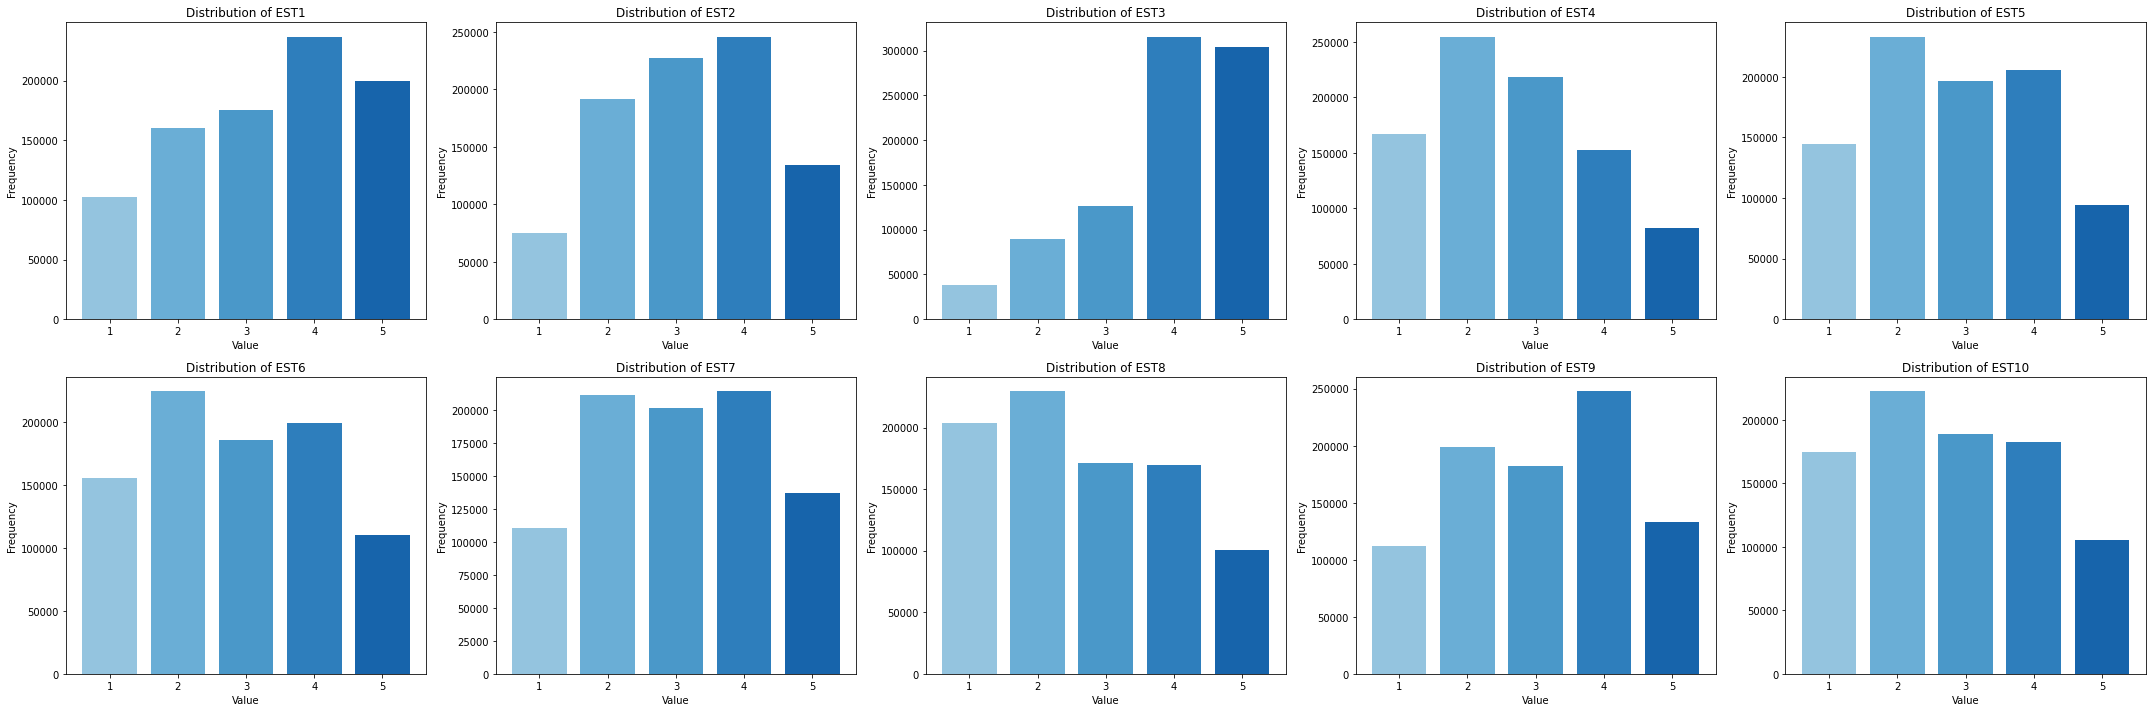

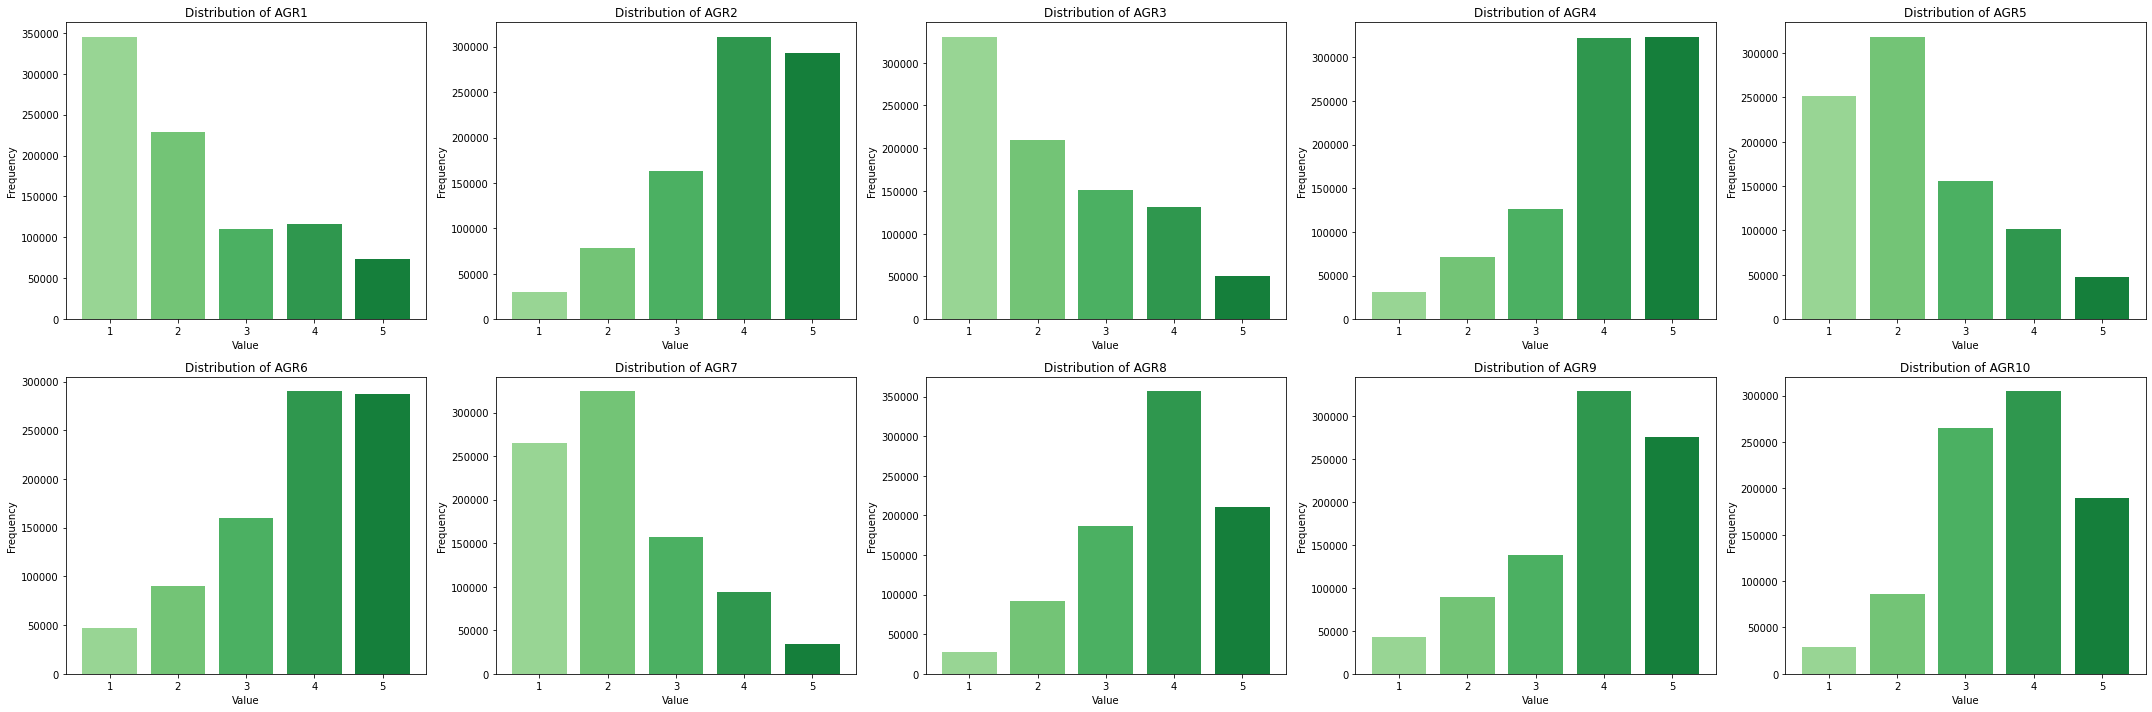

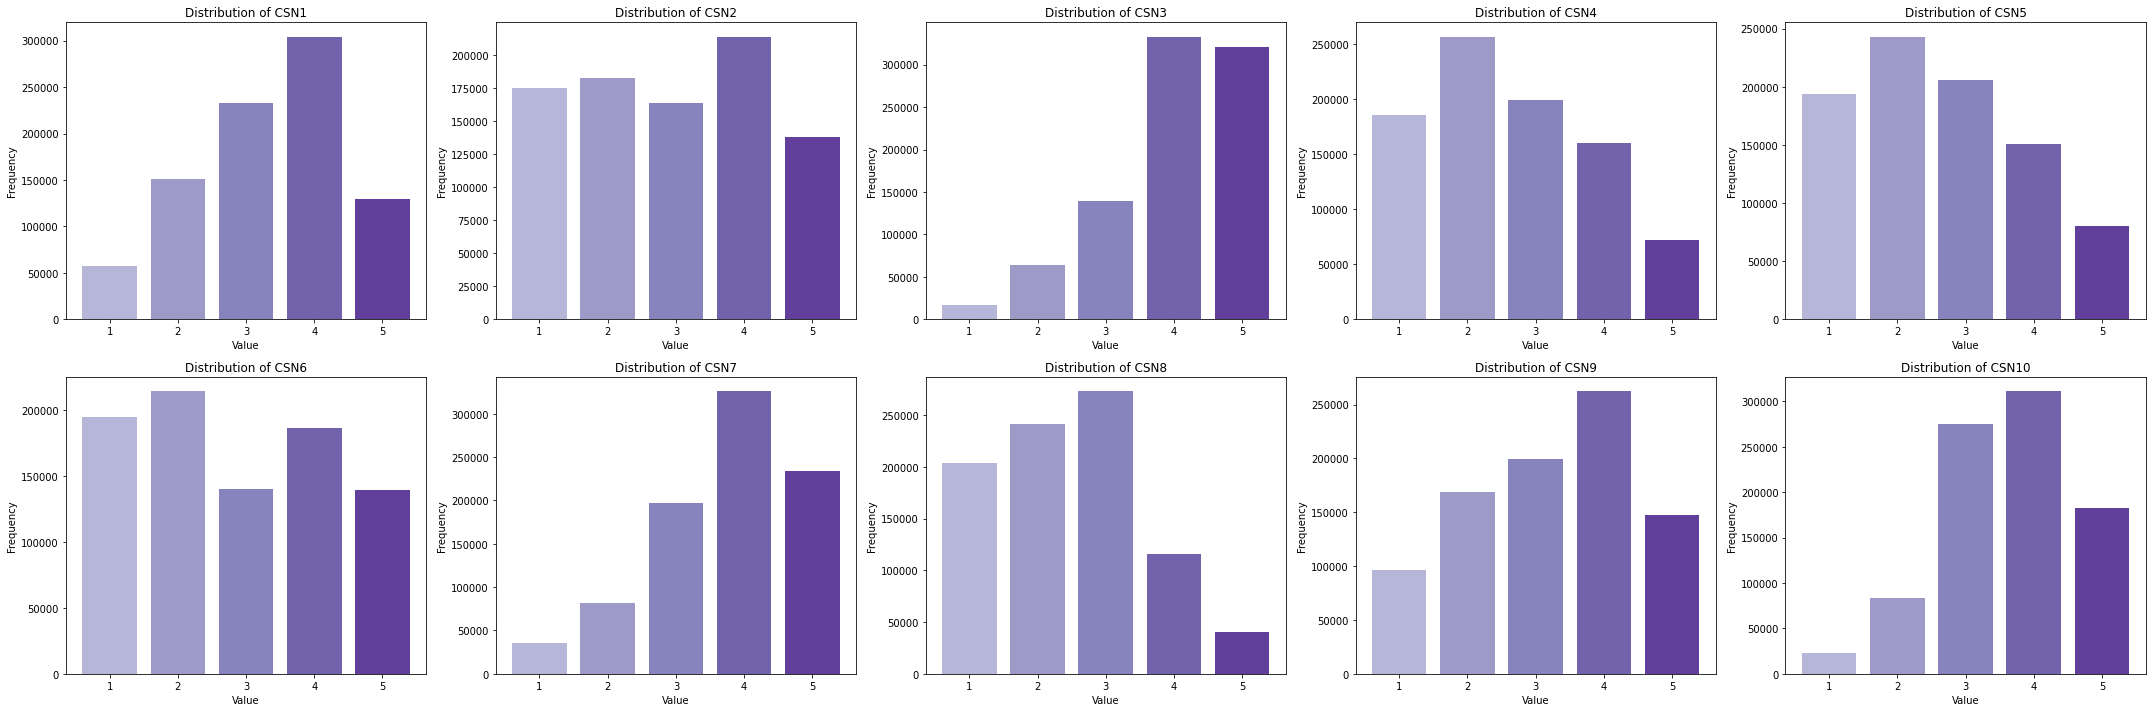

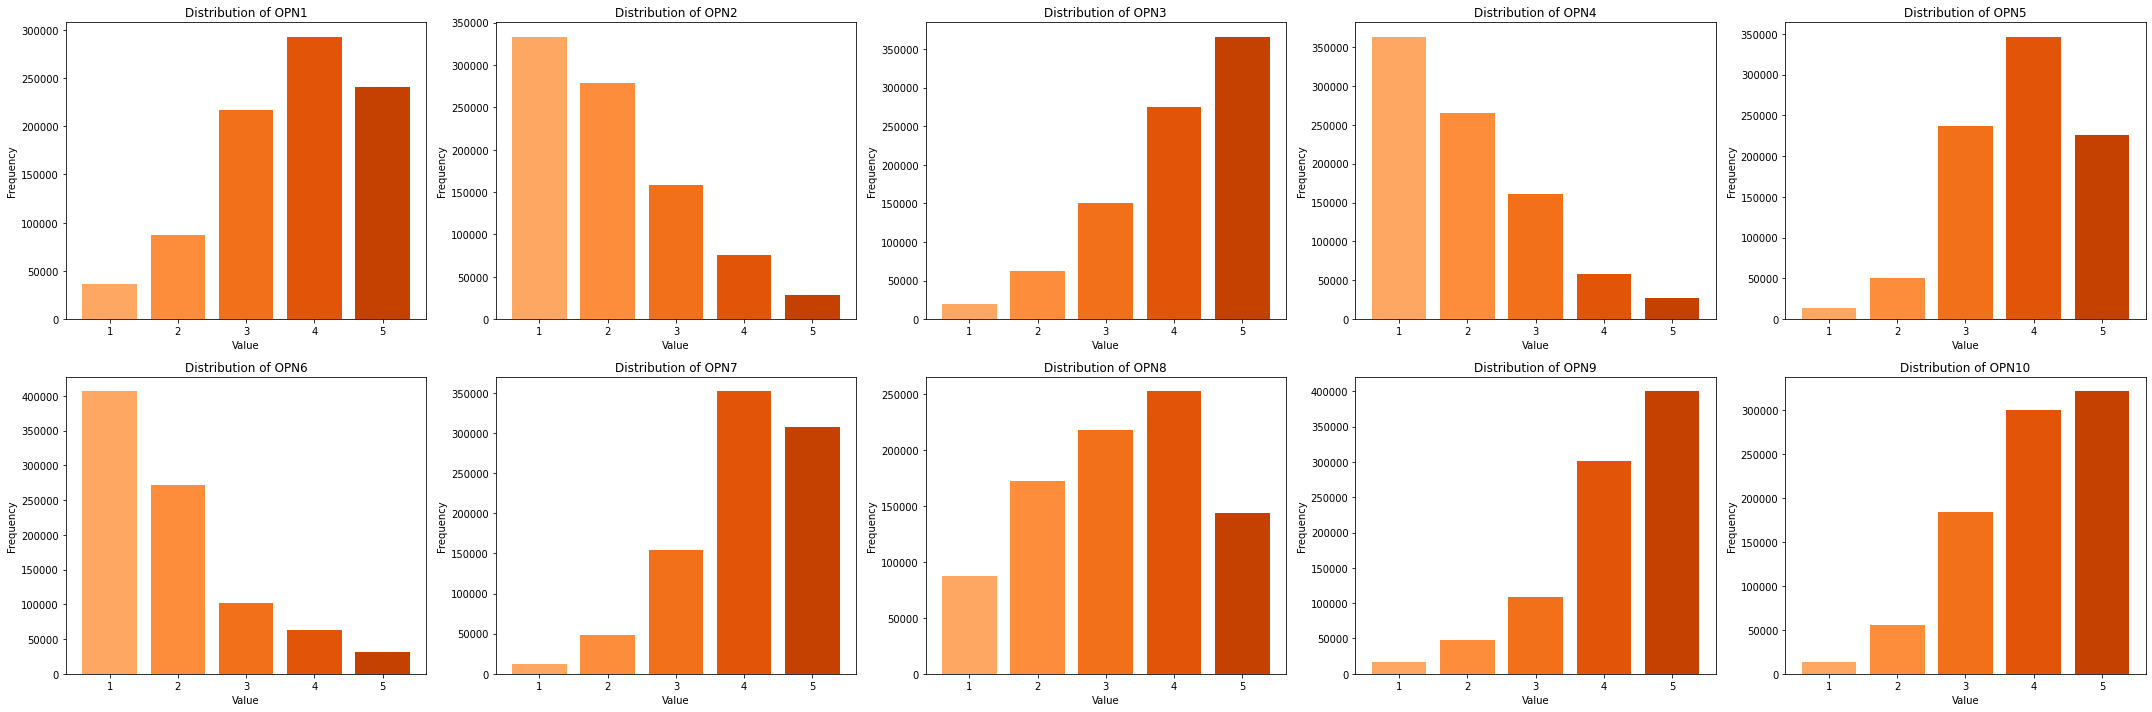

In [6]:
plot_by_statement(big5ext, cm.Reds)
plot_by_statement(big5est, cm.Blues)
plot_by_statement(big5agr, cm.Greens)
plot_by_statement(big5csn, cm.Purples)
plot_by_statement(big5opn, cm.Oranges)

## SG Life Satisfaction Dataset

In [7]:
sglifedata = pd.read_csv("../data/SGLifeSatisfaction.csv")
sglifedata.head()

,ID,Building,Age,Sex,Available_space,Overall_privacy,Furnishings,Temperature,Humidity,Air_movement,...,Personal_control,Cleanliness,Life_satisfaction_score,Life_satisfaction_score_norm,Job_satisfaction,Extraversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_experiences
0,1,B1,41 - 50,Male,Somewhat dissatisfied,Satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,...,Satisfied,Satisfied,24.0,4.8,NaN,6.0,6.0,6.0,NaN,NaN
1,2,B1,41 - 50,Male,Satisfied,Satisfied,Satisfied,Somewhat dissatisfied,Satisfied,Somewhat dissatisfied,...,Somewhat satisfied,Satisfied,28.0,5.6,6.0,NaN,6.0,6.0,6.0,NaN
2,3,B1,31 - 40,Female,Very satisfied,Satisfied,Satisfied,Somewhat dissatisfied,Satisfied,Satisfied,...,Somewhat dissatisfied,Somewhat satisfied,24.0,4.8,6.0,2.0,NaN,NaN,6.0,NaN
3,4,B1,41 - 50,Female,Somewhat satisfied,Very dissatisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,...,Dissatisfied,Dissatisfied,18.0,3.6,4.0,NaN,NaN,6.0,6.0,5.0
4,5,B1,21 - 30,Male,Satisfied,Satisfied,Very satisfied,Dissatisfied,Satisfied,Satisfied,...,Dissatisfied,Satisfied,30.0,6.0,6.0,4.0,6.0,6.0,6.0,5.0


### Data Exploration

In [8]:
sglifedata = sglifedata.loc[:, ["Age", "Sex", "Life_satisfaction_score", "Job_satisfaction",
                            "Extraversion", "Agreeableness", "Conscientiousness", "Emotional_stability", "Openness_experiences"]].dropna().drop_duplicates()
sglifedata.describe()

,Life_satisfaction_score,Job_satisfaction,Extraversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_experiences
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,25.217949,5.538462,4.081731,5.122596,5.348558,5.033654,4.713942
std,5.305795,1.128272,1.197464,0.933049,0.984583,1.063244,0.938467
min,7.000000,1.000000,1.000000,1.500000,2.000000,1.000000,2.000000
25%,22.000000,5.000000,3.500000,4.500000,4.500000,4.500000,4.000000
50%,26.000000,6.000000,4.000000,5.000000,5.500000,5.000000,4.500000
75%,30.000000,6.000000,5.000000,6.000000,6.000000,6.000000,5.500000
max,35.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


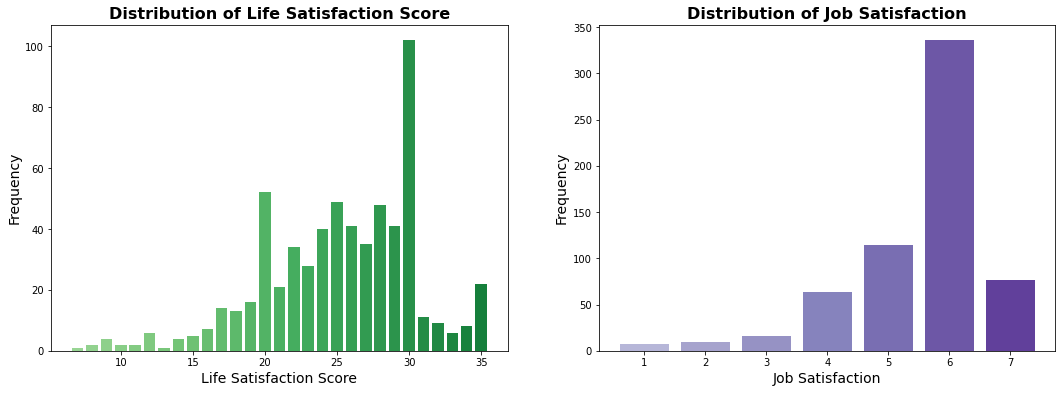

In [9]:
figure, axes = plt.subplots(1, 2, figsize=(18, 6))
axes = axes.flatten()

life_agg = sglifedata["Life_satisfaction_score"].value_counts().sort_index()
axes[0].bar(life_agg.index, life_agg.values,
            color=cm.Greens(np.linspace(0.4, 0.8, len(life_agg))))
axes[0].set_title(f'Distribution of Life Satisfaction Score', fontsize=16, fontweight="bold")
axes[0].set_xlabel('Life Satisfaction Score', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

job_agg = sglifedata["Job_satisfaction"].value_counts().sort_index()
axes[1].bar(job_agg.index, job_agg.values,
            color=cm.Purples(np.linspace(0.4, 0.8, len(job_agg))))
axes[1].set_title(f'Distribution of Job Satisfaction', fontsize=16, fontweight="bold")
axes[1].set_xlabel('Job Satisfaction', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

plt.show()

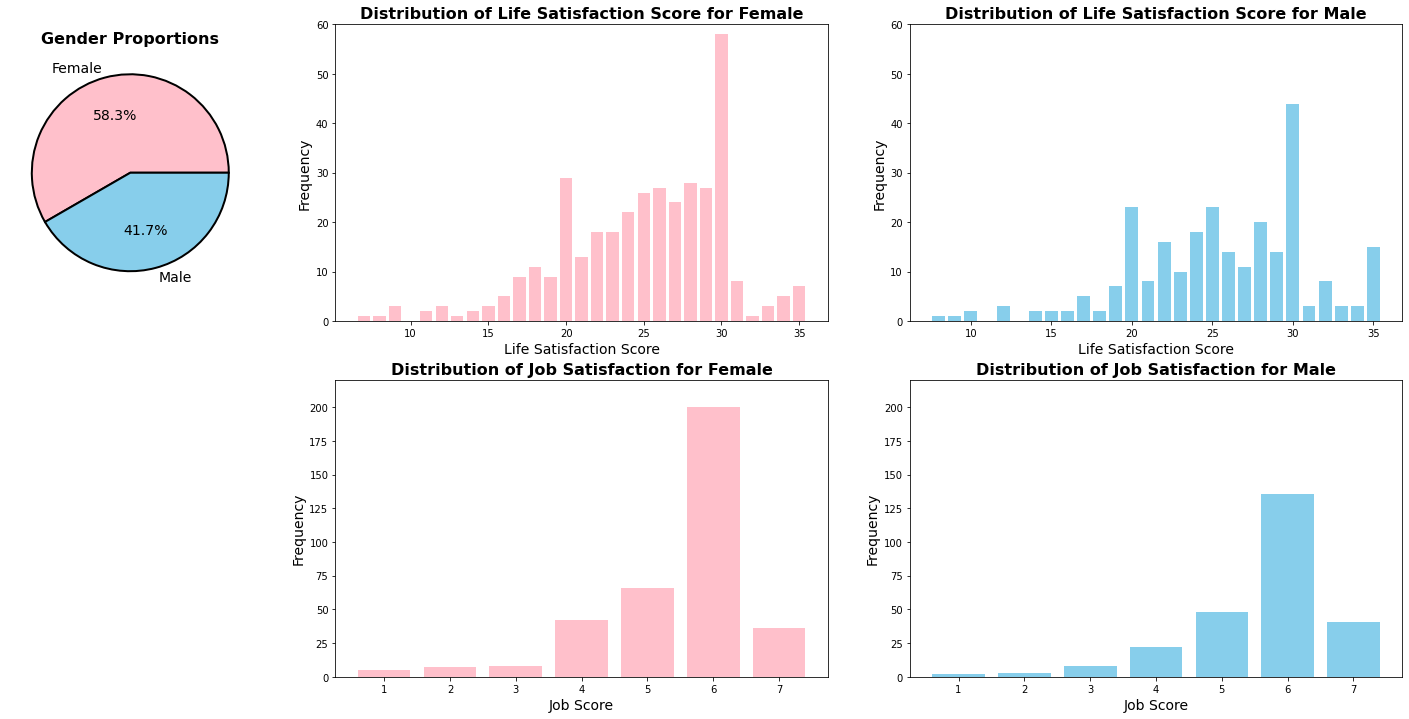

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25, 12))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 2, 2], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

gender_colours = ["pink", "skyblue"]

gender_agg = sglifedata["Sex"].value_counts()
ax1.pie(gender_agg, labels=gender_agg.index, colors=gender_colours, autopct='%1.1f%%',
        textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
ax1.set_title("Gender Proportions", fontsize=16, fontweight="bold")

life_gender = sglifedata.groupby("Sex")["Life_satisfaction_score"]
for (gender, life_agg_gender), ax, col in zip(life_gender, [ax2, ax3], gender_colours):
    life_agg_gender = life_agg_gender.value_counts().sort_index()
    ax.bar(life_agg_gender.index, life_agg_gender.values,
           color=col)
    ax.set_title(f'Distribution of Life Satisfaction Score for {gender}', fontsize=16, fontweight="bold")
    ax.set_xlabel('Life Satisfaction Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_ylim(0, 60)

job_gender = sglifedata.groupby("Sex")["Job_satisfaction"]
for (gender, job_agg_gender), ax, col in zip(job_gender, [ax4, ax5], gender_colours):
    job_agg_gender = job_agg_gender.value_counts().sort_index()
    ax.bar(job_agg_gender.index, job_agg_gender.values,
           color=col)
    ax.set_title(f'Distribution of Job Satisfaction for {gender}', fontsize=16, fontweight="bold")
    ax.set_xlabel('Job Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_ylim(0, 220)

C:\Users\tze lynn\AppData\Local\Temp\ipykernel_19380\867421023.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ocean_gender = sglifedata.groupby("Sex")["Extraversion", "Agreeableness", "Conscientiousness", "Emotional_stability", "Openness_experiences"]


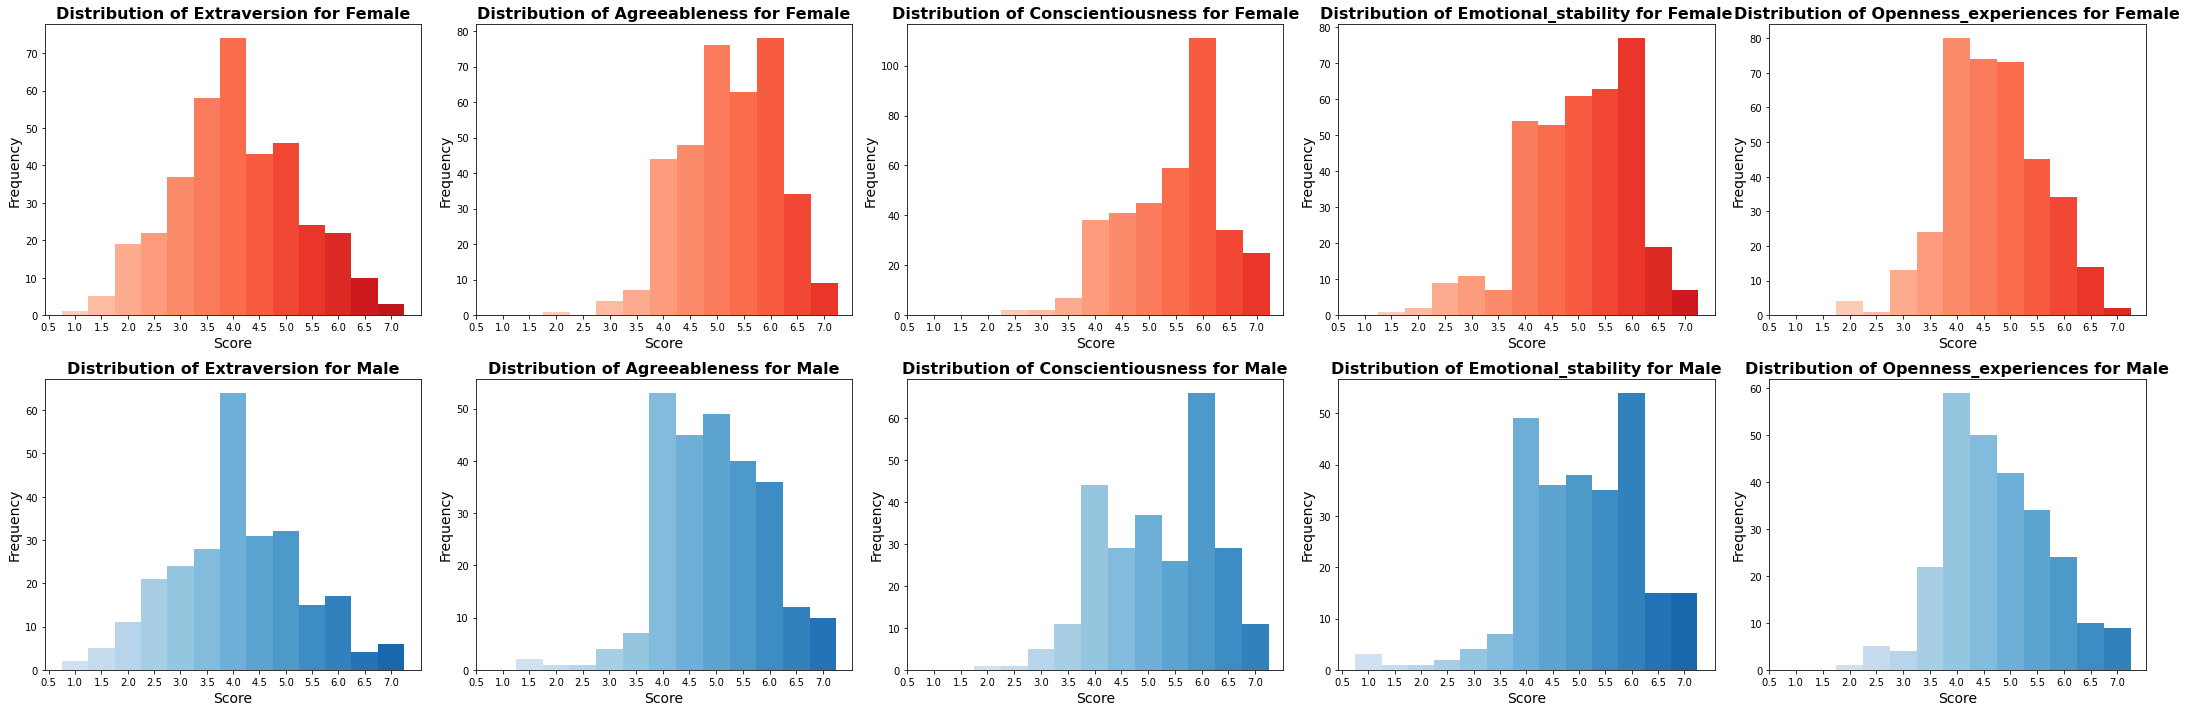

In [11]:
figure, axes = plt.subplots(2, 5, figsize=(30, 10))
axes = axes.flatten()

ocean_gender = sglifedata.groupby("Sex")["Extraversion", "Agreeableness", "Conscientiousness", "Emotional_stability", "Openness_experiences"]
plot_num = 0
gender_cmaps = [cm.Reds, cm.Blues]
for (gender, ocean_agg_gender), col in zip(ocean_gender, gender_cmaps):
    for trait in ocean_agg_gender:
       trait_agg_gender = ocean_agg_gender[trait].value_counts().sort_index()
       axes[plot_num].bar(trait_agg_gender.index, trait_agg_gender.values, width=0.5,
                          color=col(np.linspace(0.2, 2.6), len(trait_agg_gender)))
       axes[plot_num].set_title(f'Distribution of {trait} for {gender}', fontsize=16, fontweight="bold")
       axes[plot_num].set_xlabel('Score', fontsize=14)
       axes[plot_num].set_ylabel('Frequency', fontsize=14)
       axes[plot_num].set_xticks(np.array(range(1, 15)) / 2)
       plot_num += 1

plt.tight_layout()
plt.show()

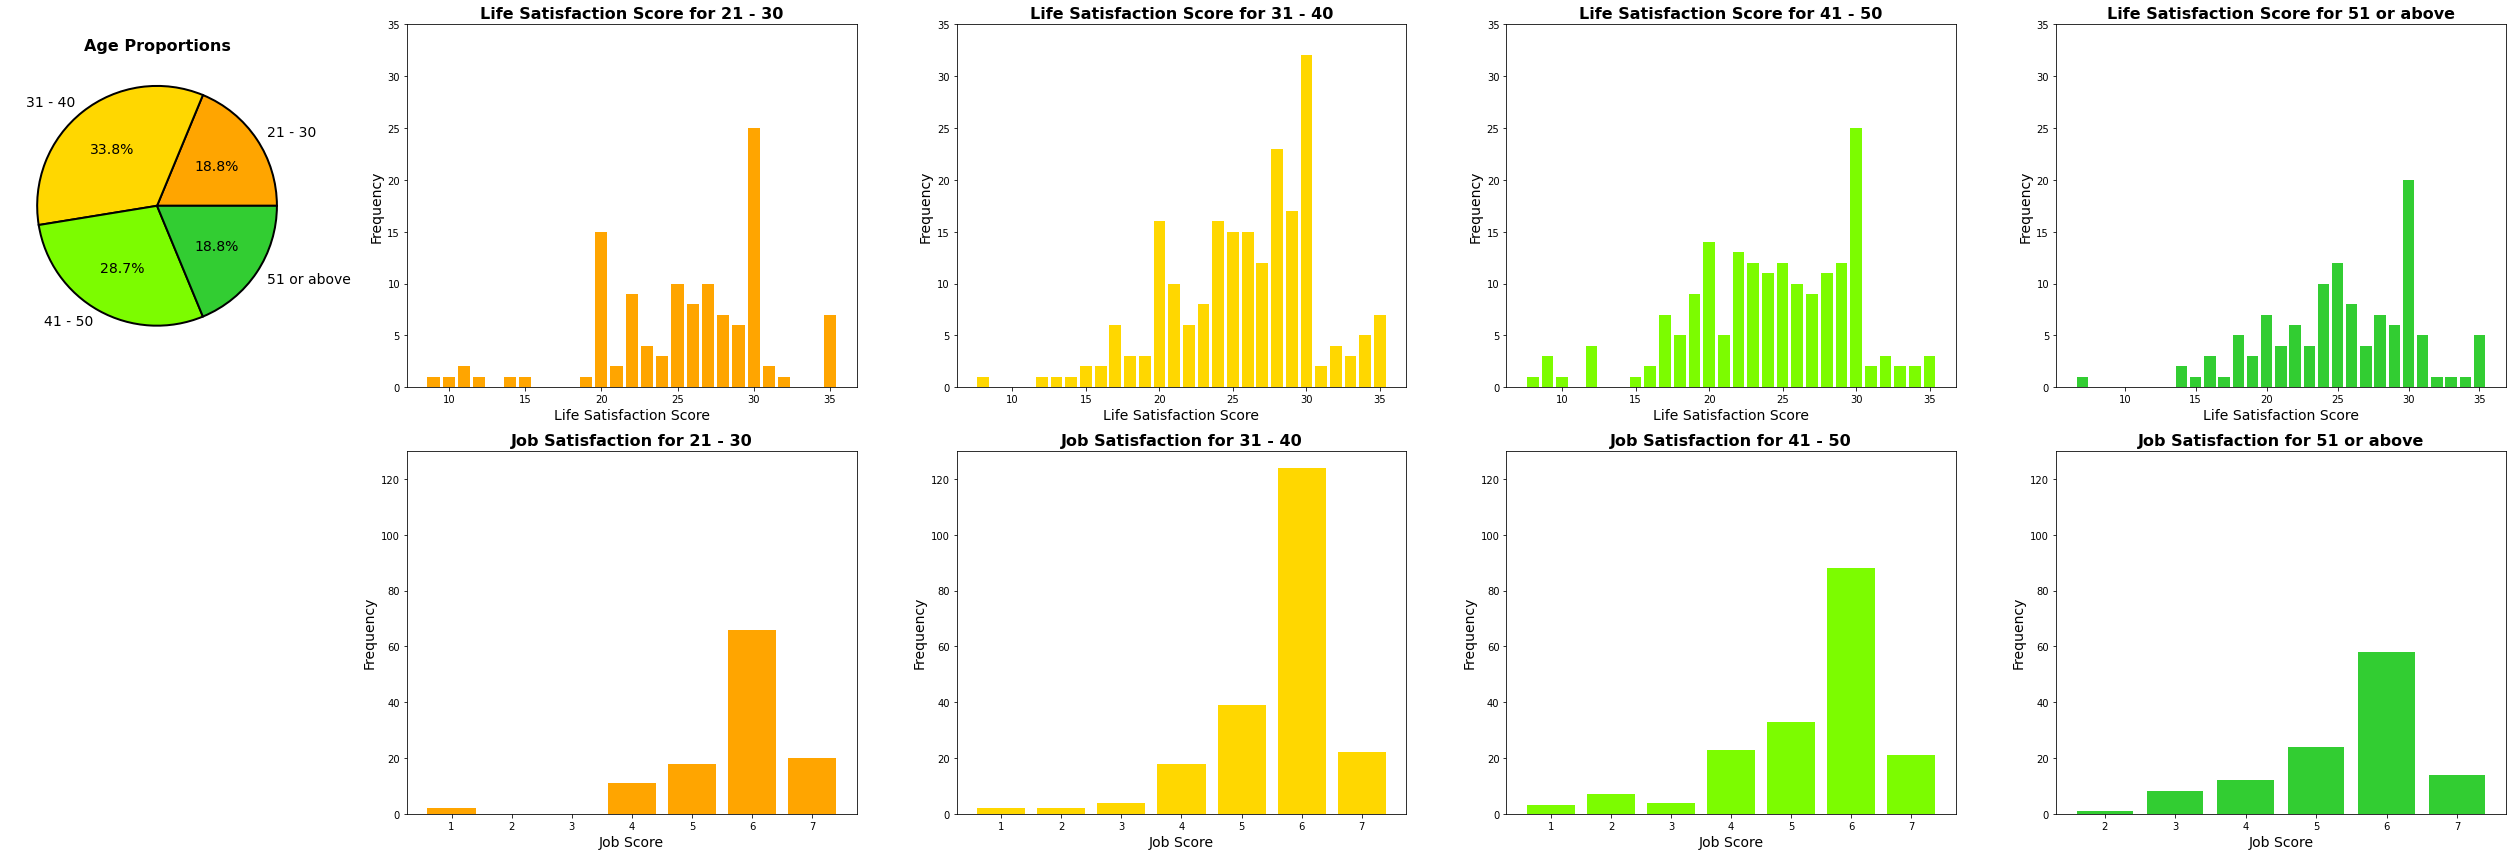

In [12]:
fig = plt.figure(figsize=(35, 12))
gs = gridspec.GridSpec(2, 5, width_ratios=[2, 3, 3, 3, 3], height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[1, 4])

age_colours = ["orange", "gold", "lawngreen", "limegreen"]

sglifedata.loc[sglifedata["Age"] == "61 or above", "Age"] = "51 or above"
sglifedata.loc[sglifedata["Age"] == "51 - 60", "Age"] = "51 or above"

age_agg = sglifedata["Age"].value_counts().sort_index()
ax1.pie(age_agg, labels=age_agg.index, colors=age_colours, autopct='%1.1f%%',
        textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
ax1.set_title("Age Proportions", fontsize=16, fontweight="bold")

life_age = sglifedata.groupby("Age")["Life_satisfaction_score"]
for (age, life_agg_age), ax, col in zip(life_age, [ax2, ax3, ax4, ax5], age_colours):
    life_agg_age = life_agg_age.value_counts().sort_index()
    ax.bar(life_agg_age.index, life_agg_age.values,
           color=col)
    ax.set_title(f'Life Satisfaction Score for {age}', fontsize=16, fontweight="bold")
    ax.set_xlabel('Life Satisfaction Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_ylim(0, 35)

job_age = sglifedata.groupby("Age")["Job_satisfaction"]
for (age, job_agg_age), ax, col in zip(job_age, [ax6, ax7, ax8, ax9], age_colours):
    job_agg_age = job_agg_age.value_counts().sort_index()
    ax.bar(job_agg_age.index, job_agg_age.values,
           color=col)
    ax.set_title(f'Job Satisfaction for {age}', fontsize=16, fontweight="bold")
    ax.set_xlabel('Job Score', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_ylim(0, 130)

plt.tight_layout()
plt.show()

### Preliminary Modelling

In [13]:
import statsmodels.api as sm

X = sglifedata.drop(columns=["Life_satisfaction_score", "Job_satisfaction", "Age"])
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
y_life = sglifedata["Life_satisfaction_score"]

X = sm.add_constant(X)
model = sm.OLS(y_life, X).fit()

print("Life Satisfaction Linear Regression Results")
print(model.summary())

y_job = sglifedata["Job_satisfaction"]

X = sm.add_constant(X)
model = sm.OLS(y_job, X).fit()

print("\n\nJob Satisfaction Linear Regression Results")
print(model.summary())

Life Satisfaction Linear Regression Results
                               OLS Regression Results                              
Dep. Variable:     Life_satisfaction_score   R-squared:                       0.070
Model:                                 OLS   Adj. R-squared:                  0.061
Method:                      Least Squares   F-statistic:                     7.766
Date:                     Fri, 06 Sep 2024   Prob (F-statistic):           4.54e-08
Time:                             20:17:29   Log-Likelihood:                -1903.5
No. Observations:                      624   AIC:                             3821.
Df Residuals:                          617   BIC:                             3852.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, cohen_kappa_score

X_pd = sglifedata.drop(columns=["Life_satisfaction_score", "Job_satisfaction", "Age"])
X_pd = pd.get_dummies(X_pd, columns=['Sex'], drop_first=True)
X = X_pd.to_numpy()
y = sglifedata[["Life_satisfaction_score", "Job_satisfaction"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
y_train_life = y_train[:, 0]
y_train_job = y_train[:, 1]
y_test_life = y_test[:, 0]
y_test_job = y_test[:, 1]

def eval_results(y_test, y_pred, model_name, pred_name):
    print(f"Using model {model_name} to predict {pred_name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("Acc:", accuracy_score(y_test, y_pred))
    print("QWK:", cohen_kappa_score(y_test, y_pred, weights='quadratic'))
    plt.plot(y_pred)
    plt.plot(y_test)
    plt.legend(["Pred", "Actual"])
    plt.ylabel("Score")
    plt.xlabel("Observation No.")
    plt.title("Prediction VS Actual")
    plt.show()

def try_model(model, X_train, y_train, X_test, y_test, model_name, pred_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_results(y_test, y_pred, model_name, pred_name)
    return model

Using model SVC to predict Life Satisfaction
MAE: 5.603174603174603
Acc: 0.12698412698412698
QWK: -0.05257093475442898


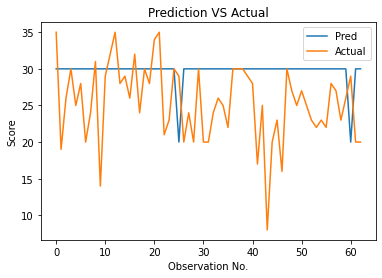

Using model SVC to predict Job Satisfaction
MAE: 0.8095238095238095
Acc: 0.49206349206349204
QWK: -0.0816326530612248


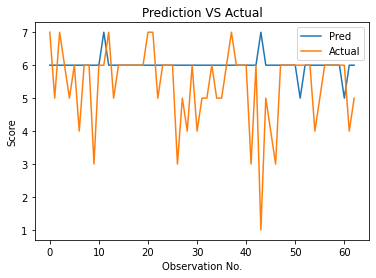

In [15]:
from sklearn.svm import SVC
svc_life = try_model(SVC(kernel='linear', decision_function_shape='ovo'), X_train, y_train_life, X_test, y_test_life, "SVC", "Life Satisfaction")
svc_job = try_model(SVC(kernel='poly', decision_function_shape='ovo', degree=4, coef0=0.2), X_train, y_train_job, X_test, y_test_job, "SVC", "Job Satisfaction")

Using model Random Forest Classifier to predict Life Satisfaction
MAE: 4.777777777777778
Acc: 0.14285714285714285
QWK: 0.12919559630212119


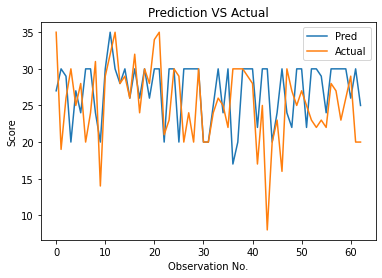

Using model Random Forest Classifier to predict Job Satisfaction
MAE: 0.873015873015873
Acc: 0.5079365079365079
QWK: -0.0719794344473006


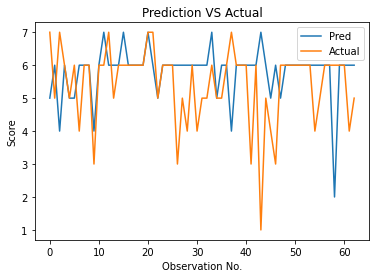

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc_life = try_model(RandomForestClassifier(max_depth=7), X_train, y_train_life, X_test, y_test_life, "Random Forest Classifier", "Life Satisfaction")
rfc_job = try_model(RandomForestClassifier(), X_train, y_train_job, X_test, y_test_job, "Random Forest Classifier", "Job Satisfaction")

Using model Gradient Boosting Classifier to predict Life Satisfaction
MAE: 4.603174603174603
Acc: 0.14285714285714285
QWK: 0.22078063672045356


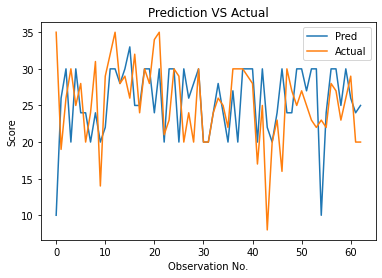

Using model Gradient Boosting Classifier to predict Job Satisfaction
MAE: 0.9365079365079365
Acc: 0.4444444444444444
QWK: -0.06039603960396023


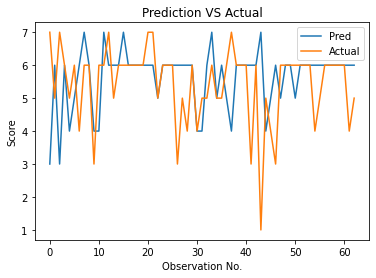

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb_life = try_model(GradientBoostingClassifier(learning_rate=0.3, min_impurity_decrease=0.1),
                    X_train, y_train_life, X_test, y_test_life, "Gradient Boosting Classifier", "Life Satisfaction")
gb_job = try_model(GradientBoostingClassifier(learning_rate=0.3, min_impurity_decrease=0.1, subsample=0.8),
                   X_train, y_train_job, X_test, y_test_job, "Gradient Boosting Classifier", "Job Satisfaction")

Using model Hist Gradient Boosting Classifier to predict Life Satisfaction
MAE: 4.507936507936508
Acc: 0.14285714285714285
QWK: 0.2743811857310978


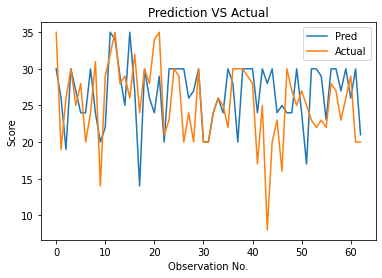

Using model Hist Gradient Boosting Classifier to predict Job Satisfaction
MAE: 0.8095238095238095
Acc: 0.5079365079365079
QWK: 0.0634648370497427


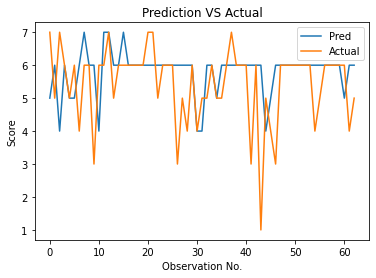

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier

hb_life = try_model(HistGradientBoostingClassifier(learning_rate=0.2, max_depth=2, l2_regularization=0.1),
                    X_train, y_train_life, X_test, y_test_life, "Hist Gradient Boosting Classifier", "Life Satisfaction")
hb_job = try_model(HistGradientBoostingClassifier(learning_rate=0.2, max_depth=3, l2_regularization=0.2, max_iter=50),
                   X_train, y_train_job, X_test, y_test_job, "Hist Gradient Boosting Classifier", "Job Satisfaction")

Using model LightGBM to predict Life Satisfaction
MAE: 5.111111111111111
Acc: 0.15873015873015872
QWK: 0.19578022919567306


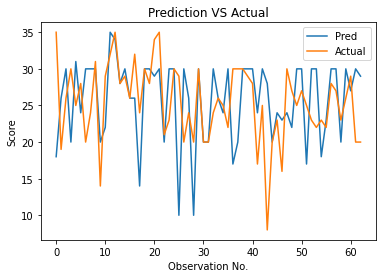

Using model LightGBM to predict Job Satisfaction
MAE: 0.7936507936507936
Acc: 0.47619047619047616
QWK: 0.18477807151801862


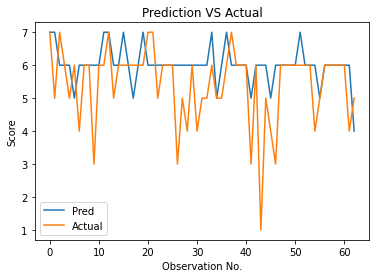

In [19]:
import lightgbm as lgb

train_data_life = lgb.Dataset(X_train, label=y_train_life)
train_data_job = lgb.Dataset(X_train, label=y_train_job)
test_data_life = lgb.Dataset(X_test, label=y_test_life, reference=train_data_life)
test_data_job = lgb.Dataset(X_test, label=y_test_job, reference=train_data_job)

params_life = {
    "objective": "multiclass",
    "num_class": int(max(np.unique(y_train_life)))+1,
    "learning_rate": 0.45,
    # "num_leaves": 40,
    "early_stopping_rounds": 10,
    "verbose": -1,
    "max_depth": 2,
    "feature_fraction": 0.9,
    "drop_rate": 0.2,
}

params_job = {
    "objective": "multiclass",
    "num_class": int(max(np.unique(y_train_job)))+1,
    "learning_rate": 0.55,
    # "num_leaves": 50,
    "early_stopping_rounds": 10,
    "verbose": -1,
    # "max_depth": 6,
    "feature_fraction": 0.9,
    # "drop_rate": 0.15,
}

lgbm_life = lgb.train(params_life, train_data_life, num_boost_round=100, valid_sets=[train_data_life, test_data_life])
y_pred_life = lgbm_life.predict(X_test).argmax(axis=1)
eval_results(y_test_life, y_pred_life, "LightGBM", "Life Satisfaction")

lgbm_job = lgb.train(params_job, train_data_job, num_boost_round=100, valid_sets=[train_data_job, test_data_job])
y_pred_job = lgbm_job.predict(X_test).argmax(axis=1)
eval_results(y_test_job, y_pred_job, "LightGBM", "Job Satisfaction")

In [48]:
print("Feature importance for selected models")
print(X_pd.columns.to_list())
print(lgbm_life.feature_importance())
print(lgbm_job.feature_importance())
print(gb_life.feature_importances_)
print(gb_job.feature_importances_)

Feature importance for selected models
['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional_stability', 'Openness_experiences', 'Sex_Male']
[122 113 105  98 101  23]
[24 22 21 24 15  9]
[0.22540148 0.19466755 0.19732477 0.2165589  0.15746215 0.00858514]
[0.17192847 0.18602054 0.23161369 0.18370351 0.16364244 0.06309134]


### Putting Together the Final Model

In [20]:
# Choosing the final features
X_pd = sglifedata.drop(columns=["Life_satisfaction_score", "Job_satisfaction", "Age", "Sex"])
X = X_pd.to_numpy()
y = sglifedata[["Life_satisfaction_score", "Job_satisfaction"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
y_train_life = y_train[:, 0]
y_train_job = y_train[:, 1]
y_test_life = y_test[:, 0]
y_test_job = y_test[:, 1]

Using model Hist Gradient Boosting Classifier to predict Life Satisfaction
MAE: 4.507936507936508
Acc: 0.1746031746031746
QWK: 0.2503065478623394


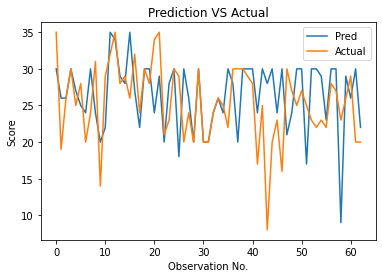

Using model LightGBM to predict Job Satisfaction
MAE: 0.7619047619047619
Acc: 0.5238095238095238
QWK: 0.06935157829264493


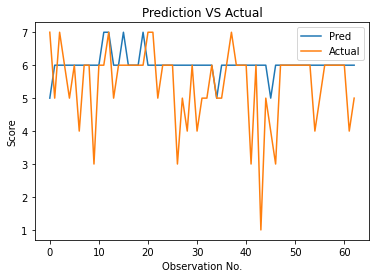

In [23]:
import lightgbm as lgb

hb_life = try_model(HistGradientBoostingClassifier(learning_rate=0.2, max_depth=2, l2_regularization=0.1),
                    X_train, y_train_life, X_test, y_test_life, "Hist Gradient Boosting Classifier", "Life Satisfaction")

train_data_life = lgb.Dataset(X_train, label=y_train_life)
train_data_job = lgb.Dataset(X_train, label=y_train_job)
test_data_life = lgb.Dataset(X_test, label=y_test_life, reference=train_data_life)
test_data_job = lgb.Dataset(X_test, label=y_test_job, reference=train_data_job)

params_job = {
    "objective": "multiclass",
    "num_class": int(max(np.unique(y_train_job)))+1,
    "learning_rate": 0.55,
    # "num_leaves": 50,
    "early_stopping_rounds": 10,
    "verbose": -1,
    # "max_depth": 6,
    "feature_fraction": 0.9,
    # "drop_rate": 0.15,
}

lgbm_job = lgb.train(params_job, train_data_job, num_boost_round=100, valid_sets=[train_data_job, test_data_job])
y_pred_job = lgbm_job.predict(X_test).argmax(axis=1)
eval_results(y_test_job, y_pred_job, "LightGBM", "Job Satisfaction")